### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**




**Лаб. №4**

**Буркевич Олександра**

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [84]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [85]:
new_df = pd.DataFrame({
    'Normal 1': np.random.normal(loc=10, scale=5, size=20),
    'Normal 2': np.random.normal(loc=5, scale=10, size=20),
    'Logistic': np.random.logistic(loc=3, scale=7, size=20),
    'Geometric': np.random.geometric(p=0.5, size=20),
    'Sample random': np.random.random_sample(size=20),
    'Uniform': np.random.uniform(size=20),
    
})

new_df

,Normal 1,Normal 2,Logistic,Geometric,Sample random,Uniform
0,15.689194,13.869273,-14.990599,2,0.025063,0.204366
1,11.959282,16.855581,0.617969,1,0.647681,0.736427
2,14.257717,-0.632859,4.161949,2,0.623398,0.572272
3,9.029274,1.917846,-2.957925,2,0.828083,0.524673
4,5.837839,5.310747,6.783494,1,0.480577,0.447858
5,6.385645,8.880603,6.425124,4,0.028185,0.009043
6,20.487242,-1.985774,-16.124277,1,0.134299,0.336937
7,5.851640,9.995268,7.356287,1,0.681162,0.651740
8,11.049618,20.843403,11.359328,2,0.283994,0.100334
9,9.351129,8.838716,18.945653,1,0.487540,0.898657


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [86]:
new_df = pd.DataFrame({key: sorted(values) for key, values in new_df.transpose().iterrows()})
new_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Normal 1,-0.315546,5.837839,5.851640,6.385645,7.765241,8.001542,8.558933,9.029274,9.351129,9.857701,11.049618,11.797726,11.881846,11.959282,14.257717,15.689194,15.753824,15.993680,19.377258,20.487242
Normal 2,-6.636669,-3.743246,-1.985774,-0.632859,0.758450,1.413082,1.917846,3.062018,5.310747,6.767783,6.951303,8.838716,8.880603,9.975492,9.995268,12.841283,13.869273,14.652564,16.855581,20.843403
Logistic,-28.934424,-16.124277,-14.990599,-6.165877,-3.164403,-2.957925,-1.769711,0.617969,4.047247,4.138555,4.161949,6.425124,6.783494,7.356287,11.359328,13.687539,15.846400,18.304417,18.945653,22.072383
Geometric,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000
Sample random,0.025063,0.028185,0.134299,0.283994,0.315964,0.394686,0.463987,0.480577,0.487540,0.524344,0.623398,0.645141,0.647681,0.681162,0.739142,0.746495,0.749184,0.828083,0.941186,0.964733
Uniform,0.009043,0.011312,0.100334,0.204366,0.248602,0.266847,0.309175,0.336937,0.338354,0.367690,0.414938,0.447858,0.524673,0.572272,0.651740,0.698256,0.736427,0.772697,0.898657,0.943644


In [87]:
def d_mean(array,n):
    alll = 0
    
    for i in range(n):
        alll += array[i]
        
    return alll / n

mean_value = {i: d_mean(new_df[i], 20) for i in new_df}

In [88]:
def s_q(array, n, mean_):
    p = 0
    
    for i in range(n):
        p += ((array[i] - mean_)**2)
        
    return p

s_sqq = {i: s_q(new_df[i], 20, mean_value[i]) for i in new_df}

In [89]:
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]


def d_b(array):
    m = 0
    
    for i in range(20 // 2):
        m += (a[i] * (array[(20 - 1) - i] - array[i]))
        
    return m
    
b_value = {i: d_b(new_df[i]) for i in new_df}

In [90]:
def W(b_v, s_sq):
    return (b_v**2) / s_sq

W_val = {i: W(b_value[i], s_sqq[i]) for i in new_df}

W_th = sts.shapiro(new_df['Normal 1'])
W_val, W_th

({'Normal 1': 0.9742377788563434,
  'Normal 2': 0.9877988270321284,
  'Logistic': 0.9531044469676448,
  'Geometric': 0.8311779533613446,
  'Sample random': 0.9559485923324598,
  'Uniform': 0.9657415839578971},
 (0.9742942452430725, 0.8416452407836914))

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [91]:
column_names = ["Variable", "Statistics", "Distribution"]
df = pd.DataFrame(columns = column_names)
df

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [92]:
df["Variable"] = new_df.keys()
df

,Variable,Statistics,Distribution
0,Normal 1,NaN,NaN
1,Normal 2,NaN,NaN
2,Logistic,NaN,NaN
3,Geometric,NaN,NaN
4,Sample random,NaN,NaN
5,Uniform,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [93]:
def norm(val, thr):
    if(val >= thr):
        l = 'normal'    
    else:
        l = 'non-normal'
    return l


df["Distribution"] = [(norm(W_val[i], W_th[0]))for i in df["Variable"]]
df

,Variable,Statistics,Distribution
0,Normal 1,NaN,non-normal
1,Normal 2,NaN,normal
2,Logistic,NaN,non-normal
3,Geometric,NaN,non-normal
4,Sample random,NaN,non-normal
5,Uniform,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [103]:
n_df=pd.DataFrame((new_df), columns=new_df.keys())

for _,val in df.iterrows():
    name = val["Variable"] 
    
    if val["Distribution"] != "non-normal": 
        val["Statistics"]="{:.3f} [{:.3f}]".format(n_df[name].mean(),n_df[name].std()) 
    else:
        val["Statistics"]="{:.3f} [{:.3f}; {:.3f}]".format(n_df[name].median(),n_df[name].quantile(0.25),n_df[name].quantile(0.75)) 
        
df

,Variable,Statistics,Distribution
0,Normal 1,10.454 [7.942; 14.616],non-normal
1,Normal 2,6.497 [7.266],normal
2,Logistic,4.150 [-3.010; 11.941],non-normal
3,Geometric,2.000 [1.000; 3.000],non-normal
4,Sample random,0.574 [0.375; 0.741],non-normal
5,Uniform,0.391 [0.262; 0.663],non-normal


8. Зберегти таблицю в пдф форматі

In [104]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

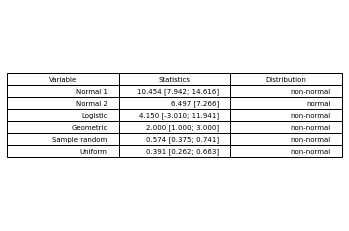

In [105]:
figure = plt.figure()
ax=figure.add_subplot(111)

cell_text = []
for row in range(len(df)):
    cell_text.append(df.iloc[row])

ax.table(cellText=cell_text, colLabels=df.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("pict.pdf")
pdf.savefig(figure)
pdf.close()